To run the notebook make sure to install ipykernel in the environment: <br />
conda install ipykernel <br />
ipython kernel install --user --name=stellar

In [1]:
import torch
import argparse
from utils import prepare_save_dir
from STELLAR import STELLAR
import numpy as np
import pandas as pd
import anndata
import scanpy as sc
import pickle
import sys
sys.path.append("../")
from datasets import GraphDataset, load_tonsilbe_data, load_hubmap_data

/home/monica/miniconda/envs/stellarV2/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


The notebook contains demo of running downsampled Tonsil/Barrett’s esophagus CODEX dataset where tonsil dataset is used as annotated dataset and Barrett’s esophagus dataset as unannotated dataset. The demo shows an example on a downsampled dataset constructed using 50% cells of the original dataset. The distance threshold for graph construction is dataset specific and here we set it to 50 as in the paper (see Fig 2h for performance with different threshold values). Datasets for running demo example can be found on [dryad](https://datadryad.org/stash/share/1OQtxew0Unh3iAdP-ELew-ctwuPTBz6Oy8uuyxqliZk). 

### Setting default parameters

In [2]:
parser = argparse.ArgumentParser(description='STELLAR')
parser.add_argument('--dataset', default='Hubmap', help='dataset setting')
parser.add_argument('--seed', type=int, default=1, metavar='S', help='random seed (default: 1)')
parser.add_argument('--name', type=str, default='STELLAR')
parser.add_argument('--epochs', type=int, default=20)
parser.add_argument('--lr', type=float, default=1e-3) # learning rate
parser.add_argument('--wd', type=float, default=5e-2) # weight decay
parser.add_argument('--num-heads', type=int, default=22)
parser.add_argument('--num-seed-class', type=int, default=0)
parser.add_argument('--sample-rate', type=float, default=0.5) # downsample dataset by using 50% of cells
parser.add_argument('-b', '--batch-size', default=1, type=int,
                metavar='N', help='mini-batch size')
parser.add_argument('--distance_thres', default=50, type=int)# distance threshold for constructing the graph
parser.add_argument('--savedir', type=str, default='./') # output directory

_StoreAction(option_strings=['--savedir'], dest='savedir', nargs=None, const=None, default='./', type=<class 'str'>, choices=None, help=None, metavar=None)

In [3]:
parser.add_argument('--use-processed-graph', type=bool, default=False) # whether to use already preprocessed graph or construct the graph 

_StoreAction(option_strings=['--use-processed-graph'], dest='use_processed_graph', nargs=None, const=None, default=False, type=<class 'bool'>, choices=None, help=None, metavar=None)

In [20]:
args = parser.parse_args(args=[])
args.cuda = torch.cuda.is_available()
args.device = torch.device("cuda" if args.cuda else "cpu")
# tryng cpu to trace errors - continues to training like normal..
# args.device = "cpu"

In [17]:
print(torch.cuda.is_available())

True


STELLAR expects graph as input. This code either loads already constructed graph from TonsilBE_processed_0.5.pkl resulting in lower running time, or also runs graph construction part:

In [18]:
if args.use_processed_graph:
    labeled_X, labeled_y, unlabeled_X, labeled_edges, unlabeled_edges, inverse_dict = pickle.load(open( "./data/TonsilBE_processed_0.5.pkl", "rb" ) )
else:
    labeled_X, labeled_y, unlabeled_X, labeled_edges, unlabeled_edges, inverse_dict = load_hubmap_data('./data/B004_training_dryad.csv', './data/B0056_unnanotated_dryad.csv', args.distance_thres, args.sample_rate)
dataset = GraphDataset(labeled_X, labeled_y, unlabeled_X, labeled_edges, unlabeled_edges)

/tmp/ipykernel_2897214/2926202700.py:4: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  labeled_X, labeled_y, unlabeled_X, labeled_edges, unlabeled_edges, inverse_dict = load_hubmap_data('./data/B004_training_dryad.csv', './data/B0056_unnanotated_dryad.csv', args.distance_thres, args.sample_rate)


### Training STELLAR

In [22]:
stellar = STELLAR(args, dataset)
stellar.train()
_, results = stellar.pred()

/home/monica/miniconda/envs/stellarV2/lib/python3.8/site-packages/torch_geometric/deprecation.py:12: UserWarning: 'data.ClusterData' is deprecated, use 'loader.ClusterData' instead
  warnings.warn(out)
Computing METIS partitioning...
Done!
/home/monica/miniconda/envs/stellarV2/lib/python3.8/site-packages/torch_geometric/deprecation.py:12: UserWarning: 'data.ClusterLoader' is deprecated, use 'loader.ClusterLoader' instead
  warnings.warn(out)


Loss: 2.520309


Computing METIS partitioning...
Done!


Loss: 1.335689


Computing METIS partitioning...
Done!


Loss: 0.801752


Computing METIS partitioning...
Done!


Loss: 0.568753


Computing METIS partitioning...
Done!


Loss: 0.473494


Computing METIS partitioning...
Done!


Loss: 0.434164


Computing METIS partitioning...
Done!


Loss: 0.415025


Computing METIS partitioning...
Done!


Loss: 0.404852


Computing METIS partitioning...
Done!


Loss: 0.399488


Computing METIS partitioning...
Done!


Loss: 0.396729


Computing METIS partitioning...
Done!


Loss: 0.394621


Computing METIS partitioning...
Done!


Loss: 0.393092


Computing METIS partitioning...
Done!


Loss: 0.392520


Computing METIS partitioning...
Done!


Loss: 0.394239


Computing METIS partitioning...
Done!


Loss: 0.394796


Computing METIS partitioning...
Done!


Loss: 0.392963


Computing METIS partitioning...
Done!


Loss: 0.393038


Computing METIS partitioning...
Done!


Loss: 0.394273


Computing METIS partitioning...
Done!


Loss: 0.394148


Computing METIS partitioning...
Done!


Loss: 0.394810


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: 0.095797


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: 0.281941


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.104337


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.121931


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.131870


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.139669


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.149995


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.151417


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.158872


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.167256


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.170716


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.179794


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.190731


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.183413


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.201079


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.190135


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.187969


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.201504


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.205746


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.205802


### Visualizing results

Cells are colored according to predicted cell types. Novel classes are denoted with numbers.

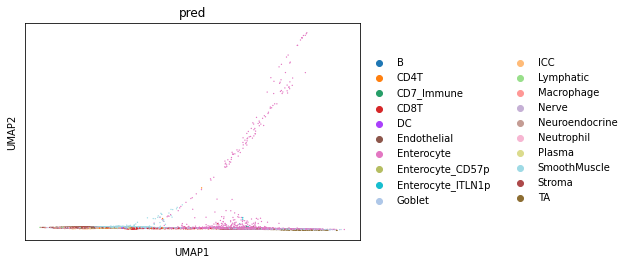

In [24]:
adata = anndata.AnnData(unlabeled_X)
results = results.astype('object')
for i in range(len(results)):
    if results[i] in inverse_dict.keys():
        results[i] = inverse_dict[results[i]]
adata.obs['pred'] = pd.Categorical(results)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.pl.umap(adata, color=['pred'], size=7)

## Epochs=30 and Sample rate=0.8

In [3]:
# trying different params
parser = argparse.ArgumentParser(description='STELLAR')
parser.add_argument('--dataset', default='Hubmap', help='dataset setting')
parser.add_argument('--seed', type=int, default=1, metavar='S', help='random seed (default: 1)')
parser.add_argument('--name', type=str, default='STELLAR')
parser.add_argument('--epochs', type=int, default=30)
parser.add_argument('--lr', type=float, default=1e-3) # learning rate
parser.add_argument('--wd', type=float, default=5e-2) # weight decay
parser.add_argument('--num-heads', type=int, default=22)
parser.add_argument('--num-seed-class', type=int, default=0)
parser.add_argument('--sample-rate', type=float, default=0.8) # downsample dataset by using 50% of cells
parser.add_argument('-b', '--batch-size', default=1, type=int,
                metavar='N', help='mini-batch size')
parser.add_argument('--distance_thres', default=30, type=int)# distance threshold for constructing the graph
parser.add_argument('--savedir', type=str, default='./') # output directory

_StoreAction(option_strings=['--savedir'], dest='savedir', nargs=None, const=None, default='./', type=<class 'str'>, choices=None, help=None, metavar=None)

In [4]:
args = parser.parse_args(args=[])
args.cuda = torch.cuda.is_available()
args.device = torch.device("cuda" if args.cuda else "cpu")

In [5]:
# reload hubmap data
labeled_X, labeled_y, unlabeled_X, labeled_edges, unlabeled_edges, inverse_dict = load_hubmap_data('./data/B004_training_dryad.csv', './data/B0056_unnanotated_dryad.csv', args.distance_thres, args.sample_rate)
dataset = GraphDataset(labeled_X, labeled_y, unlabeled_X, labeled_edges, unlabeled_edges)

In [6]:
# train
stellar = STELLAR(args, dataset)
stellar.train()
_, results = stellar.pred()

Computing METIS partitioning...
Done!


Loss: 2.694288


Computing METIS partitioning...
Done!


Loss: 1.276324


Computing METIS partitioning...
Done!


Loss: 0.702572


Computing METIS partitioning...
Done!


Loss: 0.516520


Computing METIS partitioning...
Done!


Loss: 0.455101


Computing METIS partitioning...
Done!


Loss: 0.427238


Computing METIS partitioning...
Done!


Loss: 0.411267


Computing METIS partitioning...
Done!


Loss: 0.401403


Computing METIS partitioning...
Done!


Loss: 0.396445


Computing METIS partitioning...
Done!


Loss: 0.393781


Computing METIS partitioning...
Done!


Loss: 0.393004


Computing METIS partitioning...
Done!


Loss: 0.392701


Computing METIS partitioning...
Done!


Loss: 0.393111


Computing METIS partitioning...
Done!


Loss: 0.393382


Computing METIS partitioning...
Done!


Loss: 0.393488


Computing METIS partitioning...
Done!


Loss: 0.393597


Computing METIS partitioning...
Done!


Loss: 0.394122


Computing METIS partitioning...
Done!


Loss: 0.394719


Computing METIS partitioning...
Done!


Loss: 0.394623


Computing METIS partitioning...
Done!


Loss: 0.394819


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: 0.106473


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: 0.238048


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.155257


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.178878


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.165950


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.197011


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.198374


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.208361


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.195426


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.211457


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.200401


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.219407


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.218683


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.223472


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.218935


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.229833


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.222721


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.246927


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.228615


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.234780


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.241218


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.245402


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.239420


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.251254


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.241428


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.246244


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.248436


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.245574


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.249466


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.245920


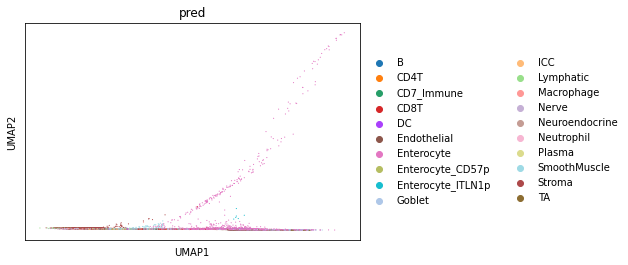

In [7]:
# visualize
adata = anndata.AnnData(unlabeled_X)
results = results.astype('object')
for i in range(len(results)):
    if results[i] in inverse_dict.keys():
        results[i] = inverse_dict[results[i]]
adata.obs['pred'] = pd.Categorical(results)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.pl.umap(adata, color=['pred'], size=5)

## Training on Tonsil Data

In [2]:
# Trying the tonsil data
parser = argparse.ArgumentParser(description='STELLAR')
parser.add_argument('--dataset', default='TonsilBE', help='dataset setting')
parser.add_argument('--seed', type=int, default=1, metavar='S', help='random seed (default: 1)')
parser.add_argument('--name', type=str, default='STELLAR')
parser.add_argument('--epochs', type=int, default=50)
parser.add_argument('--lr', type=float, default=1e-3) # learning rate
parser.add_argument('--wd', type=float, default=5e-2) # weight decay
parser.add_argument('--num-heads', type=int, default=13)
parser.add_argument('--num-seed-class', type=int, default=3)
parser.add_argument('--sample-rate', type=float, default=0.5) # downsample dataset by using 50% of cells
parser.add_argument('-b', '--batch-size', default=1, type=int,
                metavar='N', help='mini-batch size')
parser.add_argument('--distance_thres', default=50, type=int)# distance threshold for constructing the graph
parser.add_argument('--savedir', type=str, default='./') # output directory

_StoreAction(option_strings=['--savedir'], dest='savedir', nargs=None, const=None, default='./', type=<class 'str'>, choices=None, help=None, metavar=None)

In [3]:
args = parser.parse_args(args=[])
args.cuda = torch.cuda.is_available()
args.device = torch.device("cuda" if args.cuda else "cpu")

In [4]:
labeled_X, labeled_y, unlabeled_X, labeled_edges, unlabeled_edges, inverse_dict = load_tonsilbe_data('./data/BE_Tonsil_l3_dryad.csv', args.distance_thres, args.sample_rate)
dataset = GraphDataset(labeled_X, labeled_y, unlabeled_X, labeled_edges, unlabeled_edges)

In [5]:
stellar = STELLAR(args, dataset)
stellar.train()
_, results = stellar.pred()

Computing METIS partitioning...
Done!


Loss: 2.362236


Computing METIS partitioning...
Done!


Loss: 1.395502


Computing METIS partitioning...
Done!


Loss: 0.927532


Computing METIS partitioning...
Done!


Loss: 0.706225


Computing METIS partitioning...
Done!


Loss: 0.584660


Computing METIS partitioning...
Done!


Loss: 0.511424


Computing METIS partitioning...
Done!


Loss: 0.467183


Computing METIS partitioning...
Done!


Loss: 0.442121


Computing METIS partitioning...
Done!


Loss: 0.426560


Computing METIS partitioning...
Done!


Loss: 0.420179


Computing METIS partitioning...
Done!


Loss: 0.414978


Computing METIS partitioning...
Done!


Loss: 0.412021


Computing METIS partitioning...
Done!


Loss: 0.411114


Computing METIS partitioning...
Done!


Loss: 0.410623


Computing METIS partitioning...
Done!


Loss: 0.409937


Computing METIS partitioning...
Done!


Loss: 0.410389


Computing METIS partitioning...
Done!


Loss: 0.408141


Computing METIS partitioning...
Done!


Loss: 0.410516


Computing METIS partitioning...
Done!


Loss: 0.409811


Computing METIS partitioning...
Done!


Loss: 0.410487


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: 0.093223


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: 0.501487


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.003926


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.034294


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.048041


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.039746


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.084610


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.073581


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.092783


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.092589


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.098427


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.106438


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.122232


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.098879


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.101346


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.128419


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.129393


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.119761


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.130659


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.127921


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.128825


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.137609


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.139624


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.137900


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.124274


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.153899


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.143871


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.128016


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.153650


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.128124


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.157729


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.143563


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.140559


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.153497


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.159226


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.151075


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.158304


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.161833


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.150015


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.147416


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.143779


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.153334


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.171673


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.159451


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.160089


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.150443


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.149276


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.158097


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.161414


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.156825


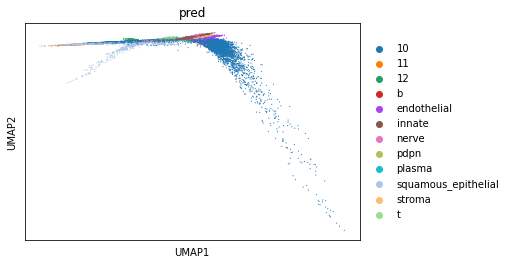

In [6]:
adata = anndata.AnnData(unlabeled_X)
results = results.astype('object')
for i in range(len(results)):
    if results[i] in inverse_dict.keys():
        results[i] = inverse_dict[results[i]]
adata.obs['pred'] = pd.Categorical(results)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.pl.umap(adata, color=['pred'], size=5)